# LAB 3: Implementation Perceptron Neural Network for IRIS dataset

## Objective
To understand and implement the Perceptron neural network, a fundamental building block of neural networks.

## Background

The IRIS dataset is a well-known dataset in machine learning, consisting of 150 samples from three species of iris flowers: Setosa, Versicolor, and Virginica. Each sample has four features: sepal length, sepal width, petal length, and petal width.

# Problem Setup
For this lab, we will modify the IRIS dataset to create a binary classification problem by combining the Versicolor and Virginica classes into a single class called "Non-Setosa."


## Program 1:

#### QUESTION : 1
Implement class sklearn.linear_model.Perceptron()to iris dataset.
Run the model epoch by epoch and print weights, bias, error and predicted y values at
the interval of 5 epoch.

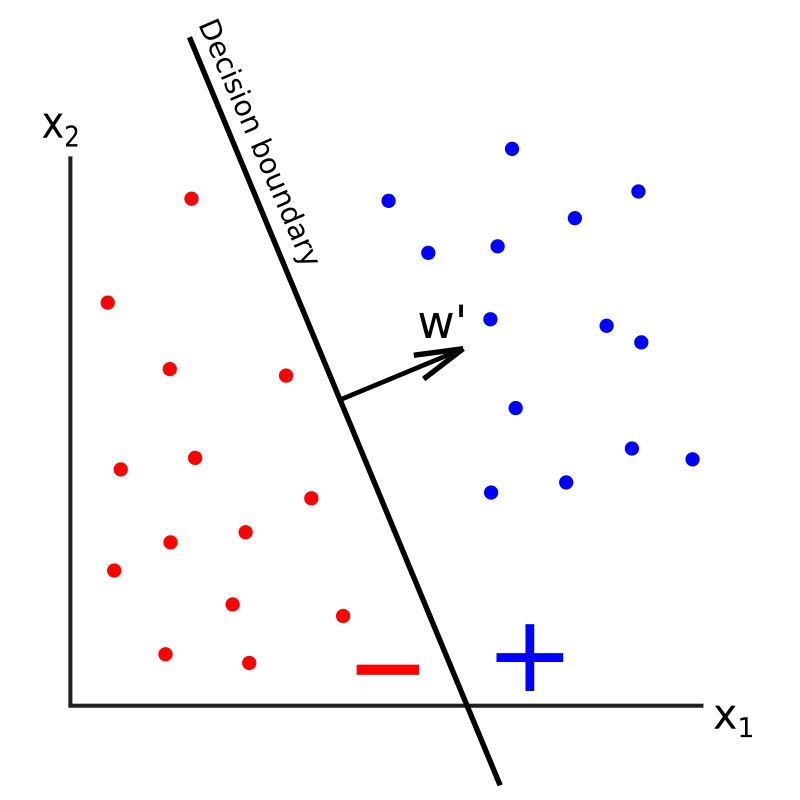

In [54]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


# Dataset load
iris = load_iris()
X = iris.data
y = iris.target

# Let us combine classes 1 and 2 into a single class (Non-Setosa)
y = np.where(y == 0, 0, 1)  # Setosa as 0, Non-Setosa as 1

# Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

perceptron = Perceptron(max_iter=1, warm_start=True, random_state=42,eta0=0.001)

epochs = 50

# Training phase
for epoch in range(epochs):
    perceptron.fit(X_train, y_train)
    weights = perceptron.coef_
    bias = perceptron.intercept_
    errors = (perceptron.predict(X_train) != y_train).sum()
    y_pred = perceptron.predict(X_train)

    # 
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch + 1}:")
        print(f"Weights: {weights}")
        print(f"Bias: {bias}")
        print(f"Errors: {errors}")
        print(f"Predicted values: {y_pred}\n")
        print(f"Actual values: {y_train}\n")


Epoch 5:
Weights: [[ 1.09051083e-05 -1.61137736e-05  1.30726082e-05  1.18468966e-05]]
Bias: [0.]
Errors: 0
Predicted values: [0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1]

Actual values: [0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1]

Epoch 10:
Weights: [[ 1.09051083e-05 -1.61137736e-05  1.30726082e-05  1.18468966e-05]]
Bias: [0.]
Errors: 0
Predicted values: [0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 

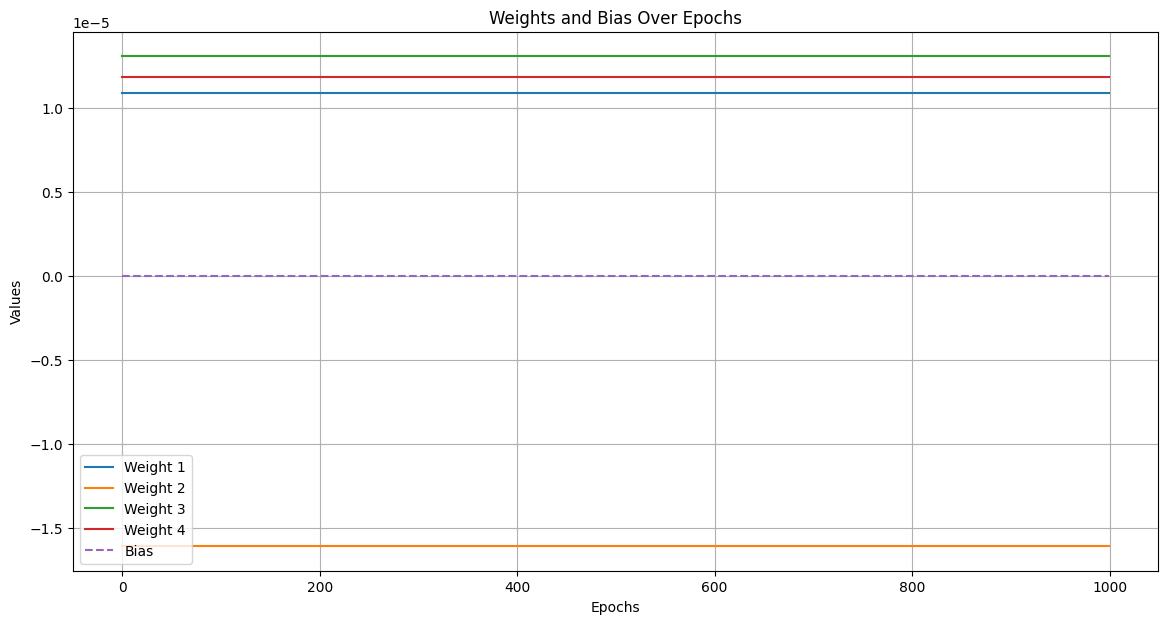

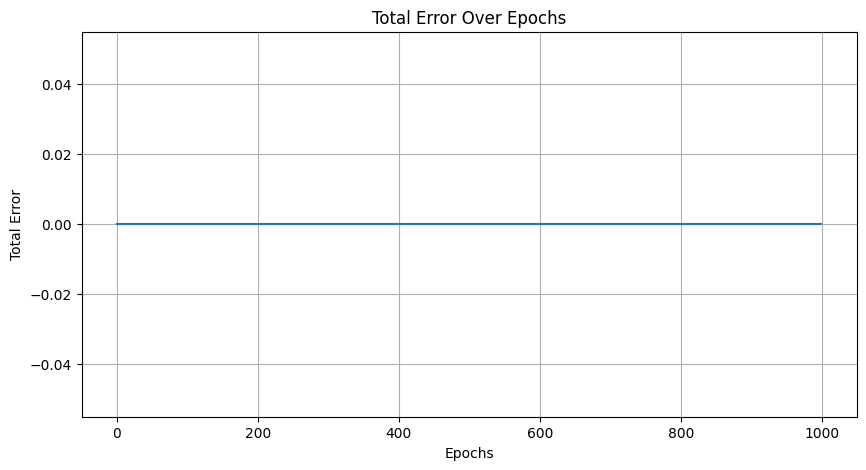

In [55]:
epochs = 1000
weights_list = []
bias_list = []
error_list = []

# Training phase
for epoch in range(epochs):
    perceptron.fit(X_train, y_train)
    weights = perceptron.coef_[0]
    bias = perceptron.intercept_[0]
    errors = (perceptron.predict(X_train) != y_train).sum()
    
    weights_list.append(weights.copy())
    bias_list.append(bias)
    error_list.append(errors)

weights_list = np.array(weights_list)
bias_list = np.array(bias_list)

plt.figure(figsize=(14, 7))
for i in range(weights_list.shape[1]):
    plt.plot(weights_list[:, i], label=f'Weight {i+1}')
plt.plot(bias_list, label='Bias', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Weights and Bias Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(error_list)
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Total Error Over Epochs')
plt.grid(True)
plt.show()

# Initial Interpretations
1. Linearly Separable Data: If the training data is perfectly linearly separable, the Perceptron algorithm will find a solution that separates the classes and then stop updating the weights and bias, as no errors will be made during subsequent iterations.

#### Perceptron learning rule, which updates the weights only when there is a misclassification.

2. Initial Convergence: The Perceptron algorithm might have converged to a solution very quickly (in this case, within the first epoch), meaning it found a set of weights and bias that correctly classify all training samples, resulting in no further updates

3. On changing the learning rates viz 0.1,0.01,0.001, there is no change why?
- If the algorithm converges very quickly (e.g., within the first epoch), then the learning rate will have minimal impact.  This is because the weights and bias reach their optimal values almost immediately, and no further updates are needed.

# What now?

- To introduce non-linearity and make the problem more challenging, we added Gaussian noise to the input features, making the data not linearly separable. 
- We manually set the initial weights and bias to non-optimal values to observe the learning process over multiple epochs and ensure that the model converges after several iterations.

Initial state:
Weights: [[-0.43593085 -0.64512091]]
Bias: [0.5012295]

Epoch 5:
Weights: [[ 0.38229892 -0.30151874]]
Bias: [0.2712295]
Errors: 7
Predicted values: [0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1]

Actual values: [0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1]

Epoch 10:
Weights: [[ 0.40719688 -0.18986104]]
Bias: [0.2612295]
Errors: 8
Predicted values: [0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1

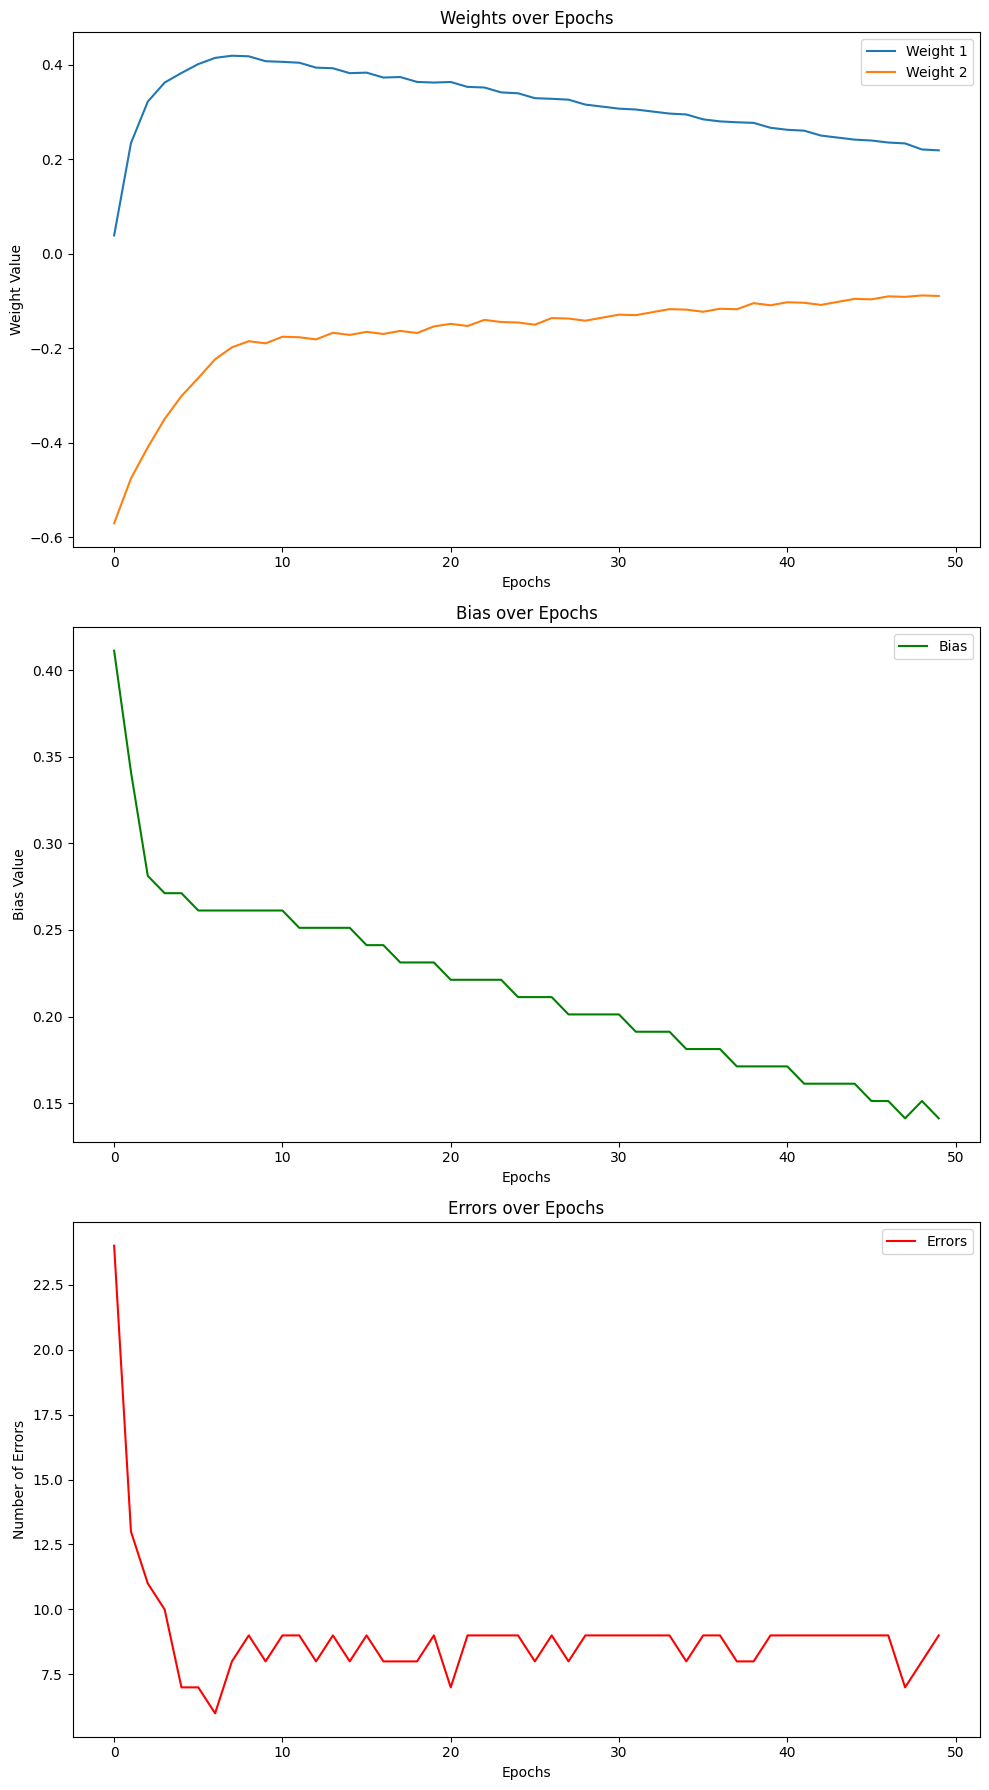

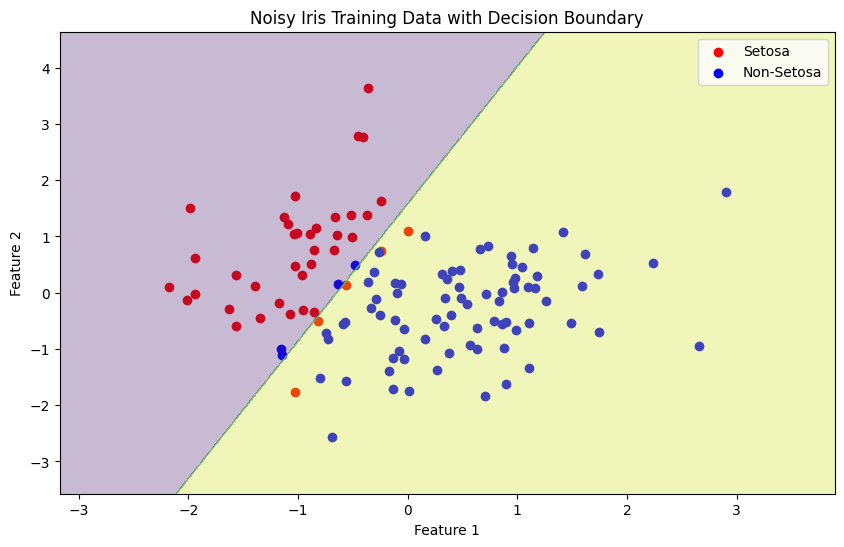

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Dataset load
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

y = np.where(y == 0, 0, 1)

# Adding noise to the data to make it not linearly separable
np.random.seed(42)
noise = np.random.normal(0, 0.3, X.shape)
X_noisy = X + noise

scaler = StandardScaler()
X_noisy = scaler.fit_transform(X_noisy)

X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

perceptron = Perceptron(max_iter=100, warm_start=True, eta0=0.01, random_state=42)

initial_weights = np.random.uniform(-1, 1, (1, X_train.shape[1]))
initial_bias = np.random.uniform(-1, 1, 1)
perceptron.coef_ = initial_weights
perceptron.intercept_ = initial_bias

print("Initial state:")
print(f"Weights: {perceptron.coef_}")
print(f"Bias: {perceptron.intercept_}\n")

epochs = 50

weights_history = []
biases_history = []
errors_history = []

# Training phase
for epoch in range(epochs):
    perceptron.partial_fit(X_train, y_train, classes=np.unique(y_train))
    weights = perceptron.coef_
    bias = perceptron.intercept_
    errors = (perceptron.predict(X_train) != y_train).sum()

    weights_history.append(weights.flatten())
    biases_history.append(bias[0])
    errors_history.append(errors)

    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch + 1}:")
        print(f"Weights: {weights}")
        print(f"Bias: {bias}")
        print(f"Errors: {errors}")
        print(f"Predicted values: {perceptron.predict(X_train)}\n")
        print(f"Actual values: {y_train}\n")

# Plotting 
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# weights
weights_history = np.array(weights_history)
for i in range(weights_history.shape[1]):
    axs[0].plot(range(epochs), weights_history[:, i], label=f'Weight {i+1}')
axs[0].set_title('Weights over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Weight Value')
axs[0].legend()

#  biases
axs[1].plot(range(epochs), biases_history, label='Bias', color='green')
axs[1].set_title('Bias over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Bias Value')
axs[1].legend()

#  errors
axs[2].plot(range(epochs), errors_history, label='Errors', color='red')
axs[2].set_title('Errors over Epochs')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Number of Errors')
axs[2].legend()

plt.tight_layout()
plt.show()

# Decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Setosa')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Non-Setosa')
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Noisy Iris Training Data with Decision Boundary')
plt.show()


# MLP for the same

C:\Users\SOHAM CHATTERJEE\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


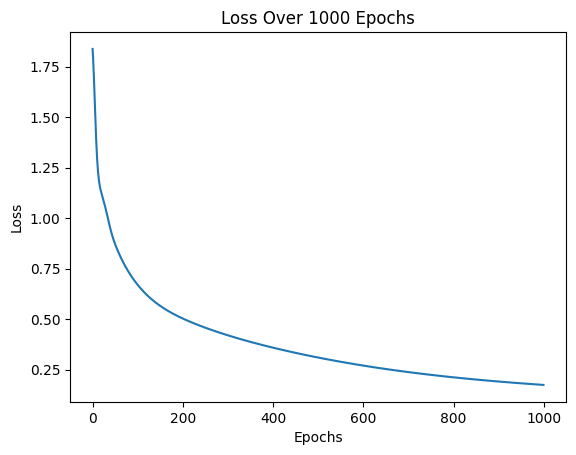

Accuracy on test data:  96.67 %


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# dataset load
iris = load_iris()
data = iris.data
labels = iris.target

# Train test split
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)


mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42, tol=1e-4, solver='sgd', learning_rate_init=0.001)

# Training phase
mlp.fit(train_data, train_labels)

# plotting loss
plt.plot(mlp.loss_curve_)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over 1000 Epochs')
plt.show()

test_preds = mlp.predict(test_data)

test_accuracy = accuracy_score(test_preds, test_labels)
print("Accuracy on test data: ", round(test_accuracy * 100, 2), "%")
